In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Bad value in file PosixPath('/Users/redface/.matplotlib/stylelib/lab-1.2.mplstyle'), line 4 ('grid.linestyle: "dotted"'): Key grid.linestyle: linestyle 'dotted' is not a valid on-off ink sequence.
Bad value in file PosixPath('/Users/redface/.matplotlib/stylelib/lab-1.2.mplstyle'), line 6 ('font.weight: "light"'): Key font.weight: "light" is not a valid font weight.


# Data Processing

First we will take a look at each dataset, and take a look at their variables

In [2]:
df3 = pd.read_csv('eda.csv')
df3.head()

,Unnamed: 0,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,benefit,benefit(+/-),year
0,0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Positive,2016
1,1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Positive,2018
2,2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Positive,2018
3,3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Positive,2016
4,4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Positive,2018


In [3]:
df3 = df3.drop(['Unnamed: 0'], axis=1)

# Hypothesis

1. How many transactions do the company earn for each city and each year?
2. What are the statistics of benefits earned for each company each year?
3. Is the benefit correlated with the travelled distances?
4. For each company, what are the attribute distribution for customers and how it related to the benefit?
5. Are Cutomer's info correlated with the benefit that cab companies earned?

# EDA

First, I want to see how many transaction does each company have per year. The reason for it is that I want to know which company is more popular, which are prefered by more people

/var/folders/hv/08dyyt957zq3n_n6kttfl_180000gn/T/ipykernel_82955/520869071.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.set_yticklabels(['0M','2M','4M','6M','8M','10M','12M'])


[Text(0, 0.5, 'Order Numbers')]

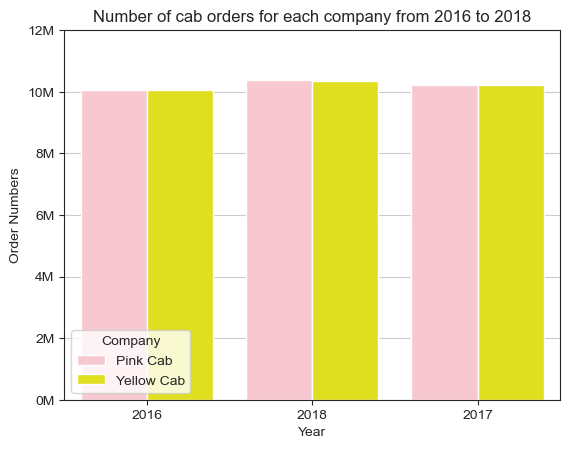

In [138]:
sns.set_style("ticks",{'axes.grid':True})
g1 = sns.barplot(data=df3, x="year", y="Transaction ID", hue="Company",palette = ["pink","yellow"])

g1.set(ylim = (0,12000000))
g1.set_yticklabels(['0M','2M','4M','6M','8M','10M','12M'])
g1.set_title("Number of cab orders for each company from 2016 to 2018")
g1.set(xlabel = "Year")
g1.set(ylabel = "Order Numbers")

From above, we can see these two companies are equally preferred by the public from 2016 to 2018

/var/folders/hv/08dyyt957zq3n_n6kttfl_180000gn/T/ipykernel_82955/1071958974.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_yticklabels(['0M','2M','4M','6M','8M','10M','12M'])


[Text(0, 0.5, 'Order Numbers')]

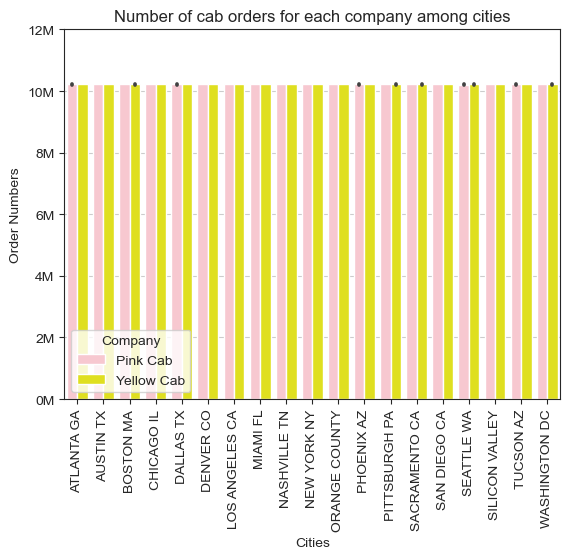

In [143]:
sns.set_style("ticks",{'axes.grid':True})
g2 = sns.barplot(data=df3, x="City", y="Transaction ID", hue="Company",palette = ["pink","yellow"])

g2.set(ylim = (0,12000000))
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)
g2.set_yticklabels(['0M','2M','4M','6M','8M','10M','12M'])
g2.set_title("Number of cab orders for each company among cities")
g2.set(xlabel = "Cities")
g2.set(ylabel = "Order Numbers")

From the above graphs, we can see that these two cab companies are equally popular among publics; thus it is hard to choose which to investgate bsed on the numbe rof orders they have

Next, I want to see the benefit trend (price charged - cost) for each company each year. In other word, I want to seek out which of them earn more money per year

In [145]:
df_2016 = df3.loc[df3['year'] == '2016',:]
df_2016_p = df_2016.loc[df_2016['Company'] == 'Pink Cab',:]
df_2016_y = df_2016.loc[df_2016['Company'] == 'Yellow Cab',:]
df_2017 = df3.loc[df3['year'] == '2017',:]
df_2017_p = df_2017.loc[df_2017['Company'] == 'Pink Cab',:]
df_2017_y = df_2017.loc[df_2017['Company'] == 'Yellow Cab',:]
df_2018 = df3.loc[df3['year'] == '2018',:]
df_2018_p = df_2018.loc[df_2018['Company'] == 'Pink Cab',:]
df_2018_y = df_2018.loc[df_2018['Company'] == 'Yellow Cab',:]

be_sum_2016_p = df_2016_p['benefit'].sum()
be_sum_2016_y = df_2016_y['benefit'].sum()
be_sum_2017_p = df_2017_p['benefit'].sum()
be_sum_2017_y = df_2017_y['benefit'].sum()
be_sum_2018_p = df_2018_p['benefit'].sum()
be_sum_2018_y = df_2018_y['benefit'].sum()

In [156]:
df_be_p = pd.DataFrame({'year': ["2016", "2017", "2018"],
                     'benefit': [be_sum_2016_p, be_sum_2017_p,be_sum_2018_p]})

df_be_y = pd.DataFrame({'year': ["2016", "2017", "2018"],
                     'benefit': [be_sum_2016_y, be_sum_2017_y,be_sum_2018_y]})

/var/folders/hv/08dyyt957zq3n_n6kttfl_180000gn/T/ipykernel_82955/3944770160.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(new_ytick_labels)


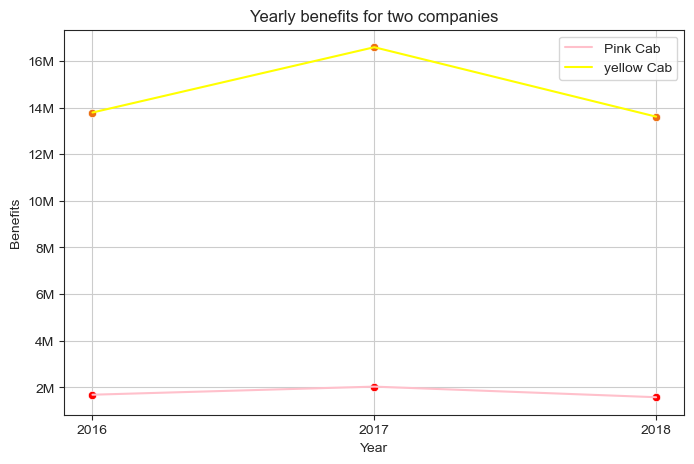

In [176]:
#fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 5))
label_p = [be_sum_2016_p, be_sum_2017_p,be_sum_2018_p]
plt.figure(figsize=(8, 5))

sns.scatterplot(x='year', y='benefit', marker="o",data=df_be_p, color='red')
sns.scatterplot(x='year', y='benefit', marker="o",data=df_be_y, color='#ec7014')

sns.lineplot(x='year', y='benefit',data=df_be_p, color = "pink",label='Pink Cab')
sns.lineplot(x='year', y='benefit', data=df_be_y, color = "yellow",label='yellow Cab')


plt.title('Yearly benefits for two companies')
plt.xlabel('Year')
plt.ylabel('Benefits')

# get the current y-tick labels
ytick_labels = [str(label) for label in plt.gca().get_yticks()]

new_ytick_labels = ['0M','2M','4M','6M','8M','10M','12M','14M','16M']

plt.gca().set_yticklabels(new_ytick_labels)

# add legend to the plot
plt.legend()

plt.show()

As we can see, the yearly profit for pink company is much lower than that of yellow company. However, the benefit for yellow company is much more fluctuated than pink company. In other word, it has large reate of increasing and decreasing benefits

Based we can see that yellow cab is worthy to investgate because it have much more benefits compare to pink company; however, the decision cannot be made with this visualization because the benefit trend is fluctuated, so we need more visualization to make investigation decision

Next, I will investigate the relationship between the benefit and distance travelled. The reason that I want to do this is because in my opinion, cab service is highly tighted with distance, if a cab travels long distance, then probably it would charge more money and earn more benefits. Thus I want to seek out the relationship between distance and profits.

In [177]:
df_pink = df3.loc[df3['Company'] == 'Pink Cab',:]
df_yellow = df3.loc[df3['Company'] == 'Yellow Cab',:]

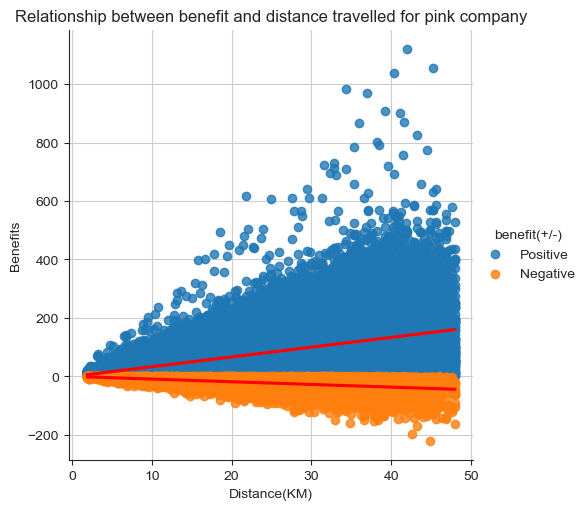

In [181]:
sns.lmplot(x="KM Travelled", y="benefit", data=df_pink, hue = "benefit(+/-)",line_kws={'color': 'red'})

plt.title('Relationship between benefit and distance travelled for pink company')
plt.xlabel('Distance(KM)')
plt.ylabel('Benefits')
plt.show()

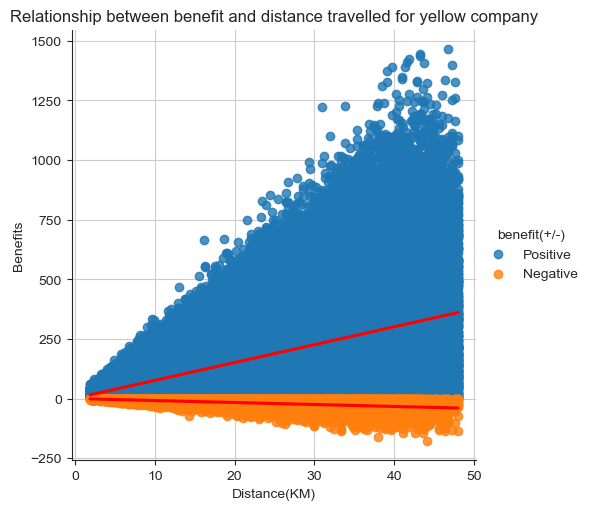

In [182]:
sns.lmplot(x="KM Travelled", y="benefit", data=df_yellow, hue = "benefit(+/-)",line_kws={'color': 'red'})

plt.title('Relationship between benefit and distance travelled for yellow company')
plt.xlabel('Distance(KM)')
plt.ylabel('Benefits')
plt.show()

Based on the visualization, we can see that for both companies, more distnances do not exactly imply more profit, as we can see, although lots of data points appear on the upper-right of the graph, there are also many data points indicate that more distance indicate negative profit; thus there are other factors not just distance that influence the benefits

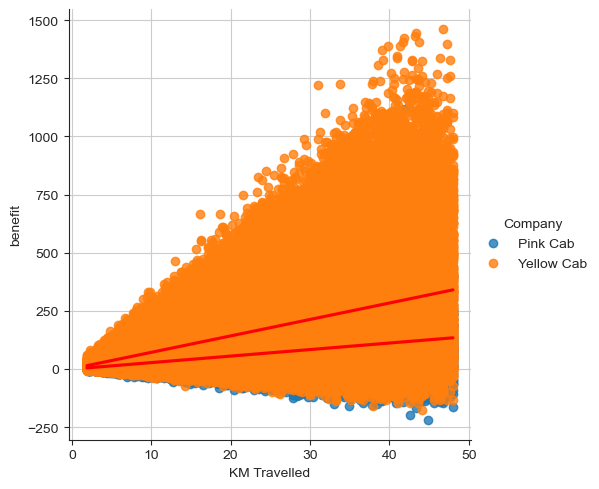

In [190]:
sns.lmplot(x="KM Travelled", y="benefit", data=df3, hue = "Company",line_kws={'color': 'red'})
plt.show()

Plotting two companies' data points are not very ideal because data points of yellow cab cover those of pink cab, but from the regression lines, we can see that for yellow cab, the relationship of driving more distance and earning more money is more postive than that of pink cab.

Since the distnace travelled does not play an essential role in the relationship of benefit, next I want to seek out how customers' information, specifically infomation like age, gender, income, and payment mode, I want to see for positive/negative benefit, how these variables are ditributed 

In [202]:
df_positive = df3.loc[df3['benefit(+/-)'] == 'Positive',:]
df_negative = df3.loc[df3['benefit(+/-)'] == 'Negative',:]

In [203]:
df_positive.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,benefit,benefit(+/-),year
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Positive,2016
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Positive,2018
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Positive,2018
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Positive,2016
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Positive,2018


[Text(0, 0.5, 'Count')]

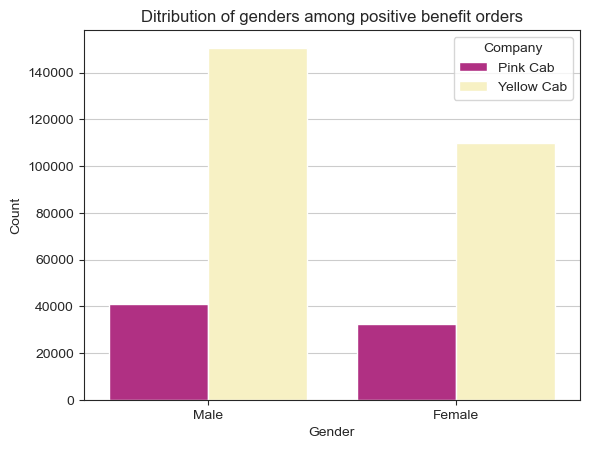

In [207]:
g4 = sns.countplot(data=df_positive, x="Gender", hue="Company", palette = {"Pink Cab": "#c51b8a", "Yellow Cab": "#fff7bc"})

g4.set_title("Ditribution of genders among positive benefit orders")
g4.set(xlabel = "Gender")
g4.set(ylabel = "Count")

[Text(0, 0.5, 'Count')]

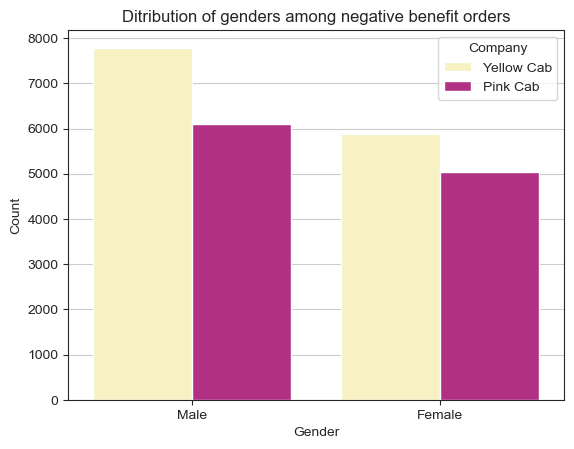

In [208]:
g5 = sns.countplot(data=df_negative, x="Gender", hue="Company", palette = {"Pink Cab": "#c51b8a", "Yellow Cab": "#fff7bc"})

g5.set_title("Ditribution of genders among negative benefit orders")
g5.set(xlabel = "Gender")
g5.set(ylabel = "Count")

As we can see from above, we can see that the number of male and female customers are relativly similar to each other. Specifcially, for both positive and negative benefit, we can see that the number of female customer is lower than male customers. However, there is a huge difference in the number of male and female users between these two companies; especially for positive benefit. We can see that in the first count plot, the number of male and female customers in yellow company are way more than those in pink company, which is one of the reason of high profits.

Next we will focus on age, first I want to plot a box plot to see the range of age for each company and positive/negative benefits

[Text(0, 0.5, 'Age')]

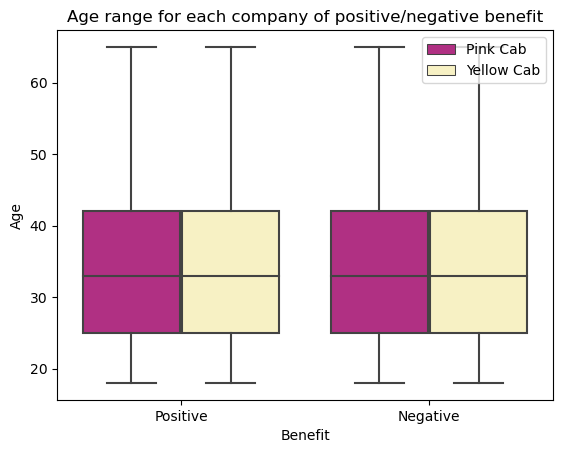

In [15]:
g6 = sns.boxplot(data = df3, x = "benefit(+/-)",y = "Age", hue = "Company", palette = {"Pink Cab": "#c51b8a", "Yellow Cab": "#fff7bc"})
plt.legend(loc="upper right")

g6.set_title("Age range for each company of positive/negative benefit")
g6.set(xlabel = "Benefit")
g6.set(ylabel = "Age")

As we can see, the age range of each company and benefit is the same, so there is no preferrence in particular age group.

Since we now know Q1, median, and Q3, we can divide the age to these range and plot them to see which company is preferred by which age of people

In [4]:
df4 = df3

In [11]:
agerange = []

for age in df4["Age"]:
    
    if age <= 33:
        agerange.append("Younger than 33")
        
    elif age in range(33,50):
        agerange.append("Age between 33 and 50")
        
    else:
        agerange.append("Older than 50")

In [12]:
df4['age_range'] = agerange
df4.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,benefit,benefit(+/-),year,age_range
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Positive,2016,Younger than 33
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Positive,2018,Younger than 33
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Positive,2018,Younger than 33
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Positive,2016,Younger than 33
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Positive,2018,Younger than 33


[Text(0, 0.5, 'Benefit')]

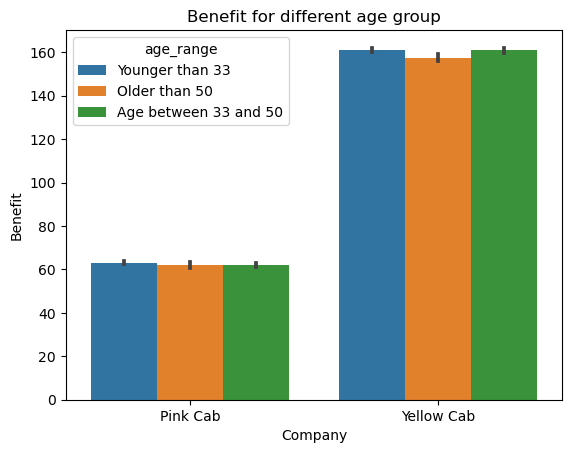

In [21]:
g7 = sns.barplot(x = "Company", y = "benefit", data = df4, hue = "age_range")

g7.set_title("Benefit for different age group")
g7.set(xlabel = "Company")
g7.set(ylabel = "Benefit")

We can see from above that for these three age groups, the benefits are nearly the same among these three age groups

Similarly, we will do this for income

[Text(0, 0.5, 'Income')]

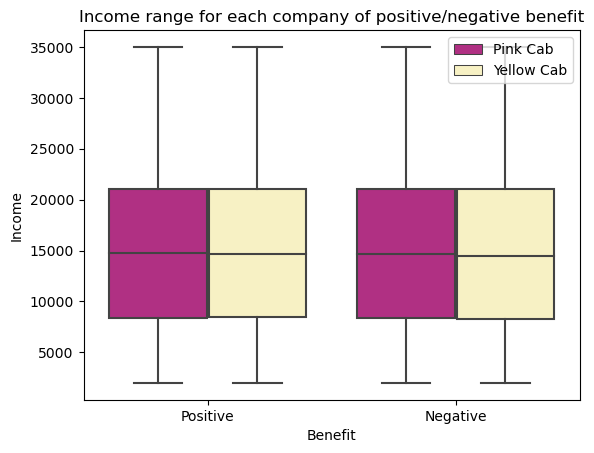

In [17]:
g7 = sns.boxplot(data = df4, x = "benefit(+/-)",y = "Income (USD/Month)", hue = "Company", palette = {"Pink Cab": "#c51b8a", "Yellow Cab": "#fff7bc"})
plt.legend(loc="upper right")

g7.set_title("Income range for each company of positive/negative benefit")
g7.set(xlabel = "Benefit")
g7.set(ylabel = "Income")

In [19]:
incomerange = []

for income in df4["Income (USD/Month)"]:
    
    if income <= 7000:
        incomerange.append("Low Income")
        
    elif income in range(7000,25000):
        incomerange.append("Median Income")
        
    else:
        incomerange.append("high Income")

In [20]:
df4['income_range'] = incomerange
df4.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,benefit,benefit(+/-),year,age_range,income_range
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Positive,2016,Younger than 33,Median Income
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Positive,2018,Younger than 33,Median Income
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Positive,2018,Younger than 33,Median Income
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Positive,2016,Younger than 33,Median Income
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Positive,2018,Younger than 33,Median Income


[Text(0, 0.5, 'Benefit')]

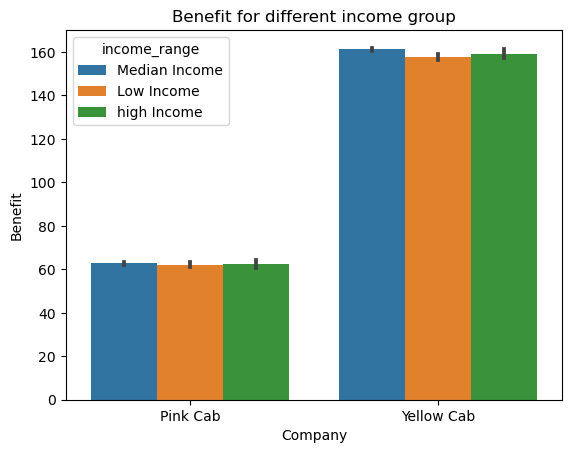

In [23]:
g8 = sns.barplot(x = "Company", y = "benefit", data = df4, hue = "income_range")

g8.set_title("Benefit for different income group")
g8.set(xlabel = "Company")
g8.set(ylabel = "Benefit")

Still, we have a similar results compare to age visualization

Next I will use pie chart to see the proportion of payment mode in different companies

In [29]:
df_pink = df4.loc[df4['Company'] == 'Pink Cab',:]
df_yellow = df4.loc[df4['Company'] == 'Yellow Cab',:]

In [31]:
count_method_pink = df_pink["Payment_Mode"].value_counts()
count_method_yellow = df_yellow["Payment_Mode"].value_counts()

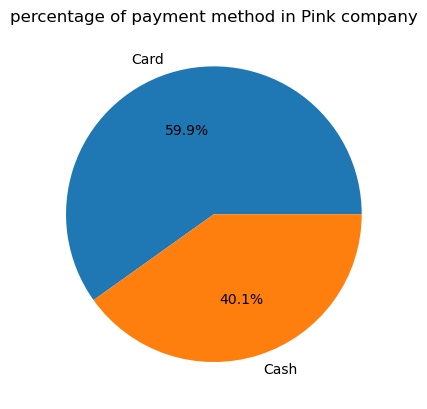

In [36]:
plt.pie(count_method_pink, labels = count_method_pink.index, autopct = '%1.1f%%')
plt.title("percentage of payment method in Pink company")
plt.show()

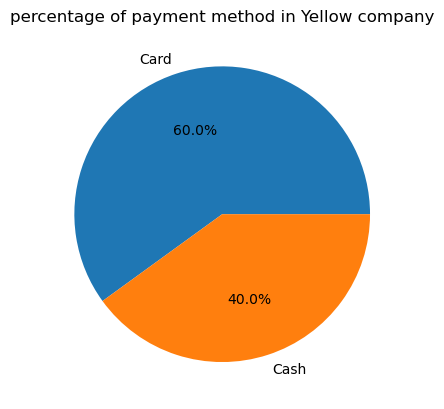

In [37]:
plt.pie(count_method_yellow, labels = count_method_yellow.index, autopct = '%1.1f%%')
plt.title("percentage of payment method in Yellow company")
plt.show()

As we can see, the percentage of card and cash users are nearly the same for these two company

Next, I will use the heatmap to which information of customer is positively or negative related to benefit

In [4]:
df5 = df3

In [5]:
df5.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,benefit,benefit(+/-),year
0,29290,Male,28,10813,10000011,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Positive,2016
1,29290,Male,28,10813,10351127,Cash,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Positive,2018
2,29290,Male,28,10813,10412921,Card,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Positive,2018
3,27703,Male,27,9237,10000012,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Positive,2016
4,27703,Male,27,9237,10320494,Card,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Positive,2018


In [7]:
df5 = df5.drop(['Customer ID','Gender','Transaction ID','Payment_Mode','Company','City','KM Travelled','benefit(+/-)','year'], axis=1)

<AxesSubplot:>

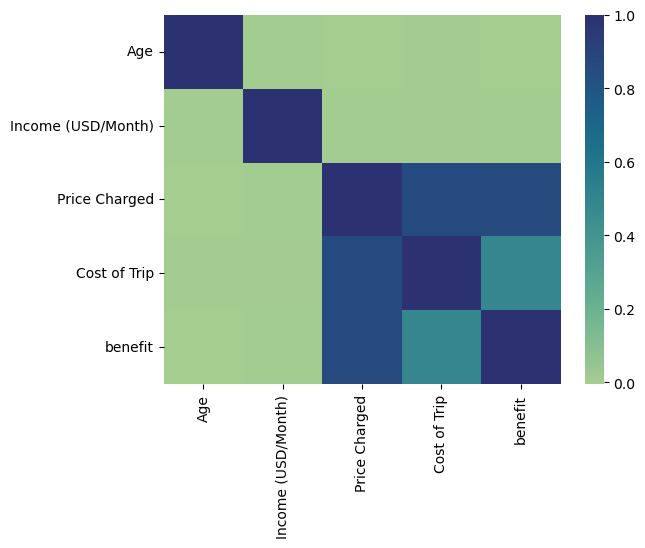

In [10]:
sns.heatmap(df5.corr(), cmap = "crest")

as we can see from the heatmap, there are variables that have no relationship with benefit such as age and income, which is also shown in the bar chart earlier, the only variables that seems to have relationship is price charged and cost, which is obvious since benefit is the difference of these two

# Conclusion

From the EDA above, we can see that Yellow company earn much more benefit than Pink company yearly. Although these two companies have relatively the same amount of transactions, the number of users for yellow company is much larger than that of pink company, which leads to larger benefits. Since the distance travelled and customers' information is not relevant with benefit, we can see that the number of users would be key factor causes large benefit. Thus for XYZ company, I would recommend them investigate yellow company since it is much more popular 